<a href="https://colab.research.google.com/github/17092003vamsi/HUNTERs/blob/main/10_6_25_ecg_image_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Total samples: 909, Classes: ['ECG Images of Myocardial Infarction Patients (240x12=2880)', 'ECG Images of Patient that have History of MI (172x12=2064)', 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)', 'Normal Person ECG Images (284x12=3408)']
✅ RF Train Acc: 100.00%
✅ RF Test Acc: 89.56%

📊 ✅ RF Classification Report:
                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       1.00      1.00      1.00        46
     ECG Images of Patient that have History of MI (172x12=2064)       0.94      0.85      0.89        34
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.92      0.73      0.81        45
                          Normal Person ECG Images (284x12=3408)       0.80      0.96      0.87       

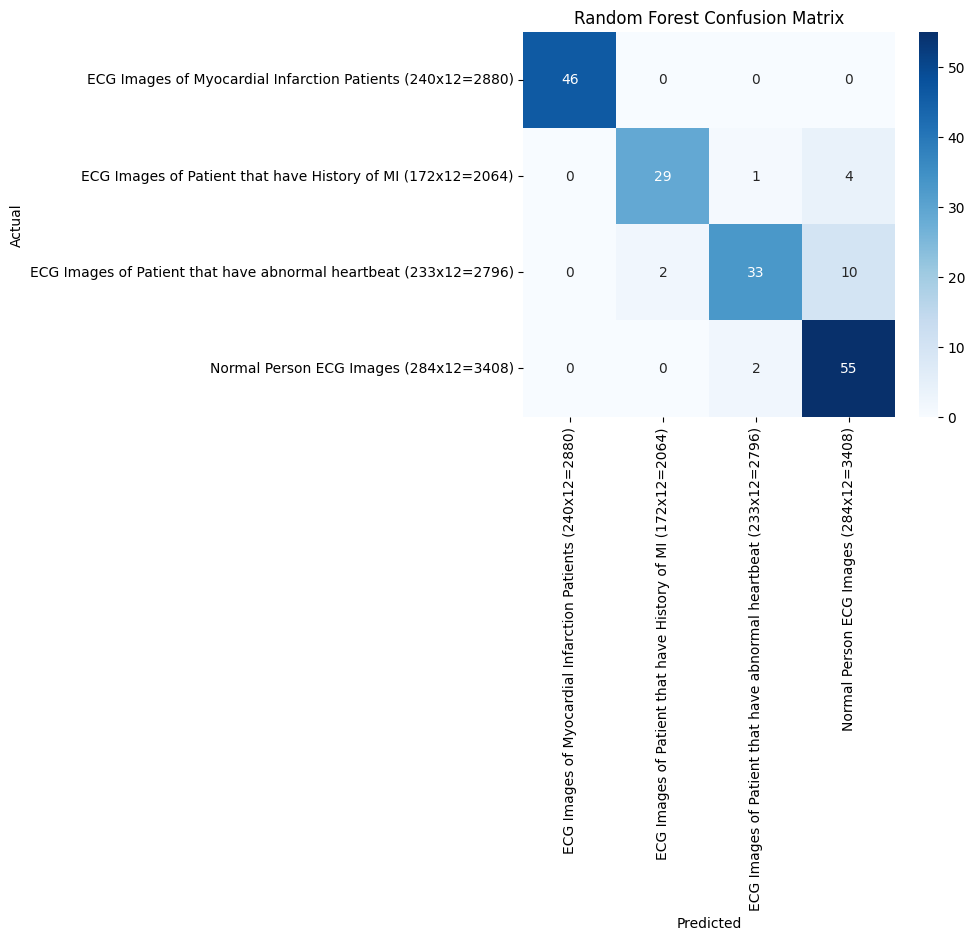

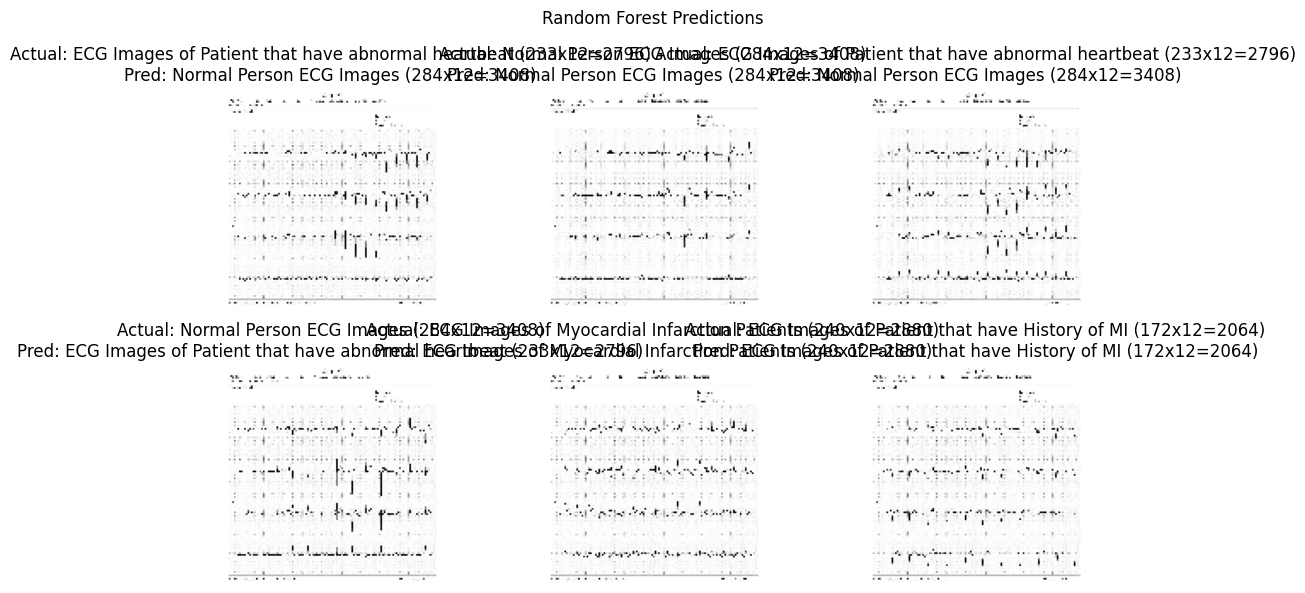

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 751ms/step - accuracy: 0.2237 - loss: 3.4327 - val_accuracy: 0.1644 - val_loss: 1.3750
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 887ms/step - accuracy: 0.3249 - loss: 1.3660 - val_accuracy: 0.1644 - val_loss: 1.3844
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 732ms/step - accuracy: 0.2868 - loss: 1.3636 - val_accuracy: 0.4932 - val_loss: 1.3137
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 734ms/step - accuracy: 0.4438 - loss: 1.3041 - val_accuracy: 0.5479 - val_loss: 1.1879
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 715ms/step - accuracy: 0.5520 - loss: 1.1340 - val_accuracy: 0.6712 - val_loss: 0.9336
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 729ms/step - accuracy: 0.6262 - loss: 0.9883 - val_accuracy: 0.7123 - val_loss: 0.7444
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 731ms/step - accuracy: 0.7048 - loss: 0.7924 - val_accuracy: 0.5890 - val_loss: 0.8207
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 719ms/step - accuracy: 0.7450 - loss: 0.6815 - val_accuracy: 0.808

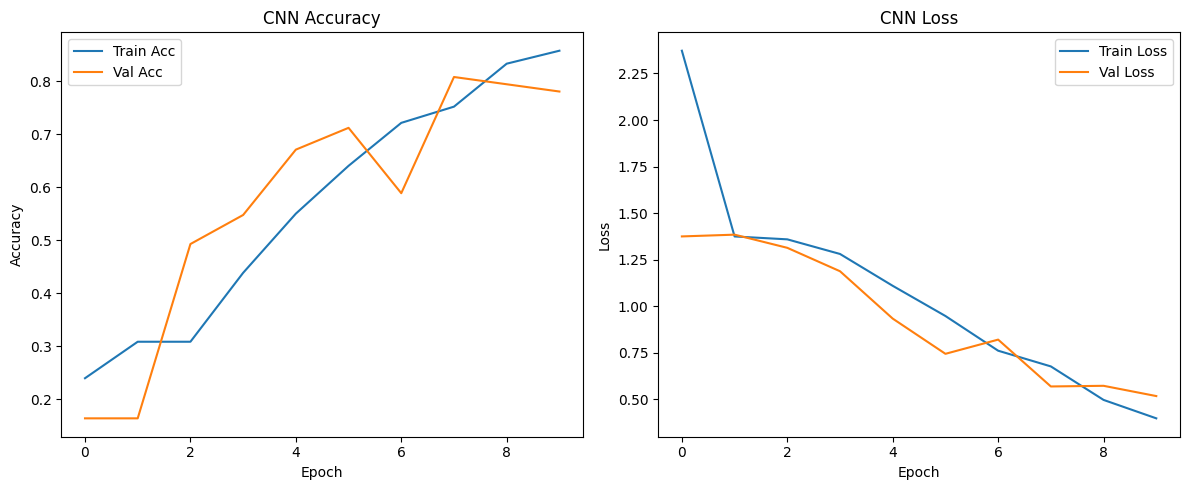

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.8035 - loss: 0.5257
✅ CNN Test Accuracy: 79.67%
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step

📊 ✅ CNN Classification Report:
                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       0.85      1.00      0.92        46
     ECG Images of Patient that have History of MI (172x12=2064)       0.88      0.65      0.75        34
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.65      0.91      0.76        45
                          Normal Person ECG Images (284x12=3408)       0.90      0.63      0.74        57

                                                        accuracy                           0.80       182
                                                       macro avg       0.82      0.80      0.79       182
                                                    weighted avg       0.82      0.8

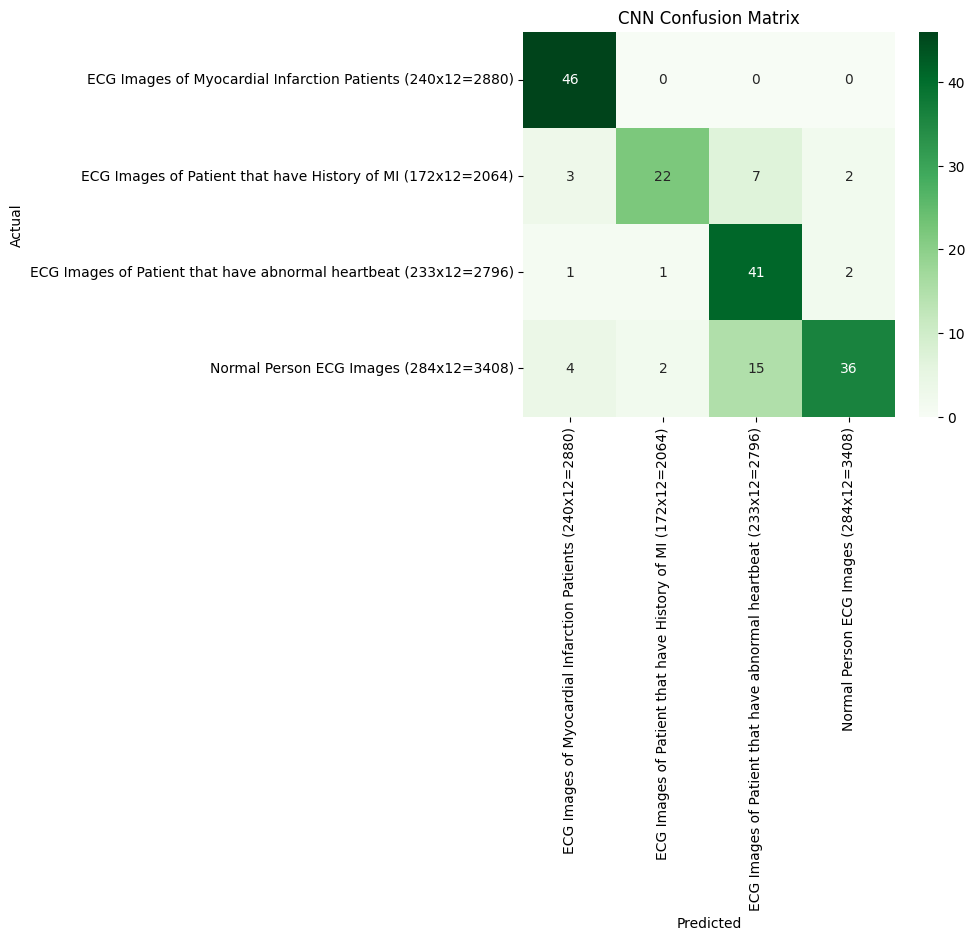

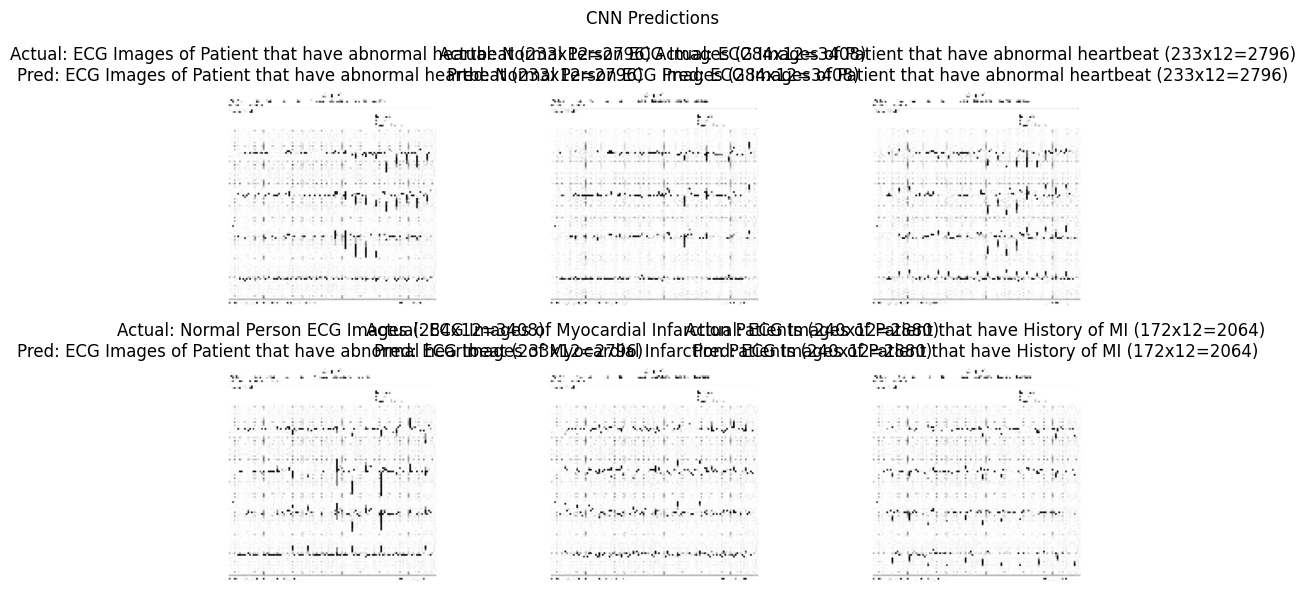

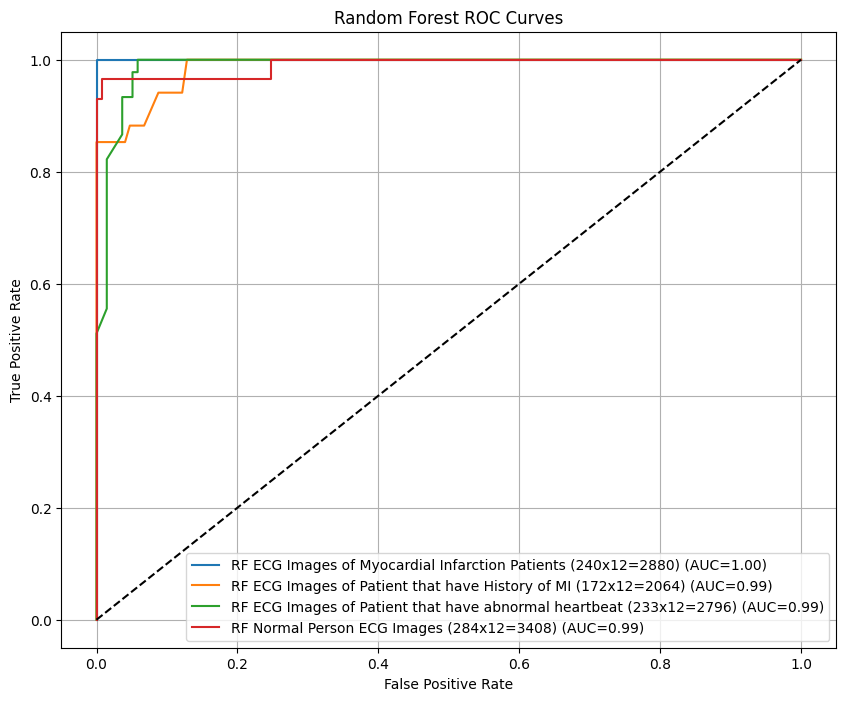

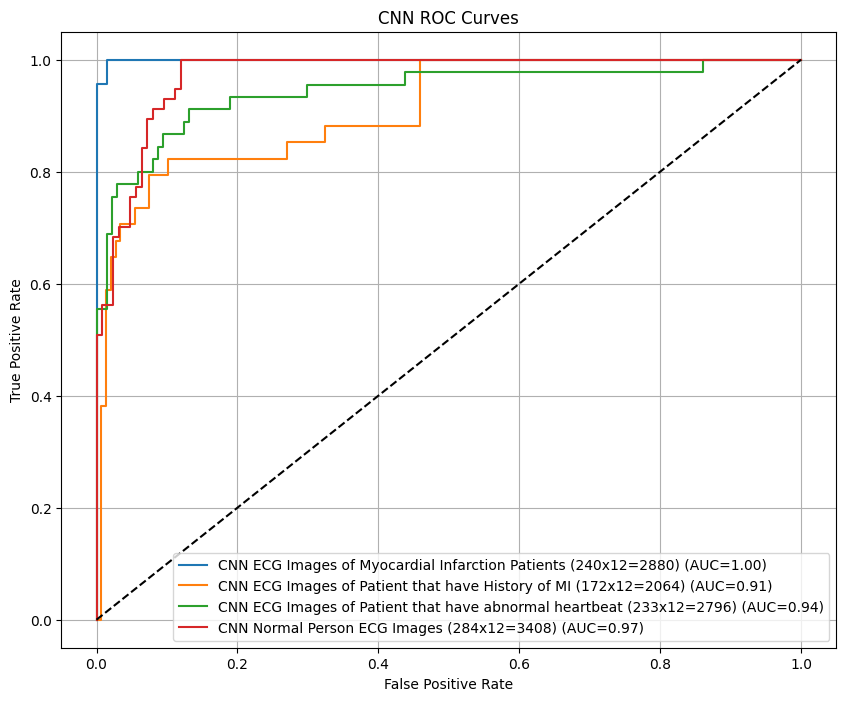

✅ Models saved successfully.


In [4]:
# ✅ Install Required Libraries
!pip install -q scikit-image opencv-python tensorflow

# ✅ Imports
import os
import cv2
import joblib
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from skimage.feature import hog
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# ✅ Mount Google Drive
drive.mount('/content/drive')

# ✅ Parameters
IMG_SIZE = (128, 128)
DATASET_PATH = "/content/drive/MyDrive/dataset of ecg project"
CATEGORIES = sorted(os.listdir(DATASET_PATH))

# ✅ Data Preparation
X_hog, y_labels, raw_images = [], [], []
label_map = {cat: idx for idx, cat in enumerate(CATEGORIES)}

for label in CATEGORIES:
    folder = os.path.join(DATASET_PATH, label)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)
            features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys',
                              visualize=True)
            X_hog.append(features)
            y_labels.append(label_map[label])
            raw_images.append(img)

X_hog = np.array(X_hog)
y_labels = np.array(y_labels)
raw_images = np.array(raw_images)
print(f"✅ Total samples: {len(X_hog)}, Classes: {CATEGORIES}")

# ✅ RF Train/Test Split
X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    X_hog, y_labels, raw_images, test_size=0.2, stratify=y_labels, random_state=42)

# ✅ Train Random Forest
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ RF Evaluation
print(f"✅ RF Train Acc: {rf_model.score(X_train, y_train) * 100:.2f}%")
print(f"✅ RF Test Acc: {rf_model.score(X_test, y_test) * 100:.2f}%")

y_pred_rf = rf_model.predict(X_test)
print("\n📊 ✅ RF Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=CATEGORIES))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d',
            cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ RF Sample Predictions
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(img_test[i], cmap='gray')
    plt.title(f"Actual: {CATEGORIES[y_test[i]]}\nPred: {CATEGORIES[y_pred_rf[i]]}")
    plt.axis('off')
plt.suptitle("Random Forest Predictions")
plt.tight_layout()
plt.show()

# ✅ Prepare for CNN
images_cnn = np.expand_dims(raw_images, axis=-1) / 255.0
y_cat = to_categorical(y_labels, num_classes=len(CATEGORIES))

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    images_cnn, y_cat, test_size=0.2, stratify=y_labels, random_state=42)

# ✅ CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(len(CATEGORIES), activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train CNN
history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_split=0.1)

# ✅ CNN Accuracy and Loss Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# ✅ CNN Evaluation
loss, test_acc_cnn = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print(f"✅ CNN Test Accuracy: {test_acc_cnn * 100:.2f}%")

# ✅ CNN Predictions
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_labels = np.argmax(y_pred_cnn, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

print("\n📊 ✅ CNN Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=CATEGORIES))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_true_labels, y_pred_labels), annot=True, fmt='d',
            cmap='Greens', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ CNN Sample Predictions
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_test_cnn[i].squeeze(), cmap='gray')
    plt.title(f"Actual: {CATEGORIES[y_true_labels[i]]}\nPred: {CATEGORIES[y_pred_labels[i]]}")
    plt.axis('off')
plt.suptitle("CNN Predictions")
plt.tight_layout()
plt.show()

# ✅ ROC Curves - Random Forest
y_test_bin_rf = label_binarize(y_test, classes=list(range(len(CATEGORIES))))
y_score_rf = rf_model.predict_proba(X_test)

plt.figure(figsize=(10, 8))
for i in range(len(CATEGORIES)):
    fpr, tpr, _ = roc_curve(y_test_bin_rf[:, i], y_score_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"RF {CATEGORIES[i]} (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Random Forest ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# ✅ ROC Curves - CNN
plt.figure(figsize=(10, 8))
for i in range(len(CATEGORIES)):
    fpr, tpr, _ = roc_curve(y_test_cnn[:, i], y_pred_cnn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"CNN {CATEGORIES[i]} (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("CNN ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# ✅ Save Models
joblib.dump(rf_model, '/content/drive/MyDrive/ecg_rf_model.pkl')
cnn_model.save('/content/drive/MyDrive/ecg_cnn_model.h5')
print("✅ Models saved successfully.")
